# Исследование турниров с помощью функционала сайта рейтинга

In [1]:
import pandas as pd
import numpy as np
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

from multiprocessing import Pool
import time

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', 1000)

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import KMeans

from functions import *

## Описание основных функций с примерами

In [2]:
# Внимание!
# Перечисленные ниже функции создают большое количество файлов у вас на жёстком диске
# Это связано с тем, что API сайта рейтинга достаточно медленный,
# время выполнения некоторых функций может быть достаточно большим (20 минут и более)
# Для борьбы с этим уже скачанные с API команды и турниры сохраняются на диске.
# Это сокращает время ПОВТОРНОГО запуска функций с теми же параметрами с минут до миллисекунд
# Вы можете скачать логи тут: https://github.com/rosolimo212/chgk_results/tree/master/get_team_from_tourn
# Тогда примеры из данного файла будут выполнятся очень быстро

### Информация о команде

In [3]:
# Успешно ли команда сыграла турнир: 1 - если "в плюс" по рейтингу, -1 - если "в минус"
get_team_result(4585, 55606)

1

In [4]:
# Успешно ли команда сыграла набор турниров: 1 - если "в плюс" по рейтингу, -1 - если "в минус"
get_team_results([4585, 4739], 55606)

,res,tourn_id,team_id
0,1,4585,55606
1,1,4739,55606


In [5]:
# Расплюсовка команды на турнире в исходном виде
get_team(4585, 55606)

,mask,tour
0,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]",1
1,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]",2
2,"[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]",3
3,"[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]",4
4,"[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",5
5,"[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]",6


In [6]:
# Расплюсовка в нормальном виде
get_team_from_tourn(4585, 55606)

,tourn_id,team_id,qv1,qv2,qv3,qv4,qv5,qv6,qv7,qv8,qv9,qv10,qv11,qv12,qv13,qv14,qv15,qv16,qv17,qv18,qv19,qv20,qv21,qv22,qv23,qv24,qv25,qv26,qv27,qv28,qv29,qv30,qv31,qv32,qv33,qv34,qv35,qv36,qv37,qv38,qv39,qv40,qv41,qv42,qv43,qv44,qv45,qv46,qv47,qv48,qv49,qv50,qv51,qv52,qv53,qv54,qv55,qv56,qv57,qv58,qv59,qv60,qv61,qv62,qv63,qv64,qv65,qv66,qv67,qv68,qv69,qv70,qv71,qv72,qv73,qv74,qv75,qv76,qv77,qv78,qv79,qv80,qv81,qv82,qv83,qv84,qv85,qv86,qv87,qv88,qv89,qv90
0,4585,55606,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0


In [7]:
# Рейтинг взятых вопросов команды на конкретном турнире
get_team_rating(4585, 55606)

23.640625

In [8]:
# Результат команды на разных классах вопросов на турнире 
team_tourn_cat_dif(4585, 55606).head(5)

,class,plus,total,dif,top,team_share,avg_share,mark
1,0.333333,14,16,0.297852,0.809375,0.875000,0.702148,2
3,1.000000,9,18,0.539062,0.641667,0.500000,0.460938,1
0,0.000000,12,25,0.739375,0.396000,0.480000,0.260625,2
2,0.666667,7,31,0.903730,0.170968,0.225806,0.096270,2


In [9]:
# Классифицирует команду на турнире
# stab - стабильные (равномерная степень взятия вопросов)
# tech - техничные (берут простые, не берут сложные)
# creat - креативные (берут сложные, не берут простые)
# unst - нестабильные (не попали ни в какую категорию)
# weak - слабые (недостаточно статистики для взятия)
team_mark(4585, 55606)

'creat'

### Информация о турнире

In [10]:
# Общая информация о турнире
get_tourn(4585).head(5)

,base_name,bonus_a,bonus_b,current_name,d_bonus_a,d_bonus_b,d_diff_bonus,diff_bonus,idteam,included_in_rating,mask,position,predicted_position,questions_total,tech_rating
0,Первая сборная,0,1290,Первая сборная,2287,1290,-28,-28,4109,1,1.101110e+89,2.0,1,55,5957
1,Пользование лифтом запрещено,0,409,Пользование лифтом запрещено,0,409,146,146,4477,1,1.000000e+89,55.0,60,21,1156
2,Команда,0,108,Команда,0,108,0,0,28748,1,1.000000e+76,64.0,64,10,878
3,Слон потрогает тебя,1905,867,Лучшая ветка самарского метро,1905,867,-31,-31,37760,1,1.100010e+85,17.5,14,34,3982
4,На своей волне,0,450,На своей волне,0,450,-130,-130,39152,1,1.100100e+75,52.0,33,22,2923


In [11]:
# Успешность всех команд на турнире
get_tourn_result(4585).head(5)

,team_id,name,diff_bonus,tourn_id,result
0,4109,Первая сборная,-28,4585,-1
1,4477,Пользование лифтом запрещено,146,4585,1
2,28748,Команда,0,4585,0
3,37760,Лучшая ветка самарского метро,-31,4585,-1
4,39152,На своей волне,-130,4585,-1


In [12]:
# Раплюсовка для всех команд турнира
get_tourn_plus(4585).head(5)

,tourn_id,team_id,qv1,qv2,qv3,qv4,qv5,qv6,qv7,qv8,qv9,qv10,qv11,qv12,qv13,qv14,qv15,qv16,qv17,qv18,qv19,qv20,qv21,qv22,qv23,qv24,qv25,qv26,qv27,qv28,qv29,qv30,qv31,qv32,qv33,qv34,qv35,qv36,qv37,qv38,qv39,qv40,qv41,qv42,qv43,qv44,qv45,qv46,qv47,qv48,qv49,qv50,qv51,qv52,qv53,qv54,qv55,qv56,qv57,qv58,qv59,qv60,qv61,qv62,qv63,qv64,qv65,qv66,qv67,qv68,qv69,qv70,qv71,qv72,qv73,qv74,qv75,qv76,qv77,qv78,qv79,qv80,qv81,qv82,qv83,qv84,qv85,qv86,qv87,qv88,qv89,qv90
0,4585,4109,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1
1,4585,4477,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,4585,28748,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,4585,37760,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
4,4585,39152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [13]:
# Сложность вопросов турнира и классы сложности вопросо
# share - число команд, не взявших вопрос
# class_chare - сложность класса вопросов
tourn_dif(4585).head(5)

,sum,total,share,qv_num,label,class,class_chare
32,25,64,0.609375,1,3,1.000000,0.539062
40,19,64,0.703125,2,0,0.000000,0.739375
50,15,64,0.765625,3,0,0.000000,0.739375
60,11,64,0.828125,4,2,0.666667,0.903730
62,10,64,0.843750,5,2,0.666667,0.903730


In [14]:
# Классифицирует все команлды на турнире
tourn_mark(4585).head(5)

,Unnamed: 0,type,team_id,current_name
0,0,stab,4109,Первая сборная
1,1,stab,4477,Пользование лифтом запрещено
2,2,stab,28748,Команда
3,3,creat,37760,Лучшая ветка самарского метро
4,4,stab,39152,На своей волне


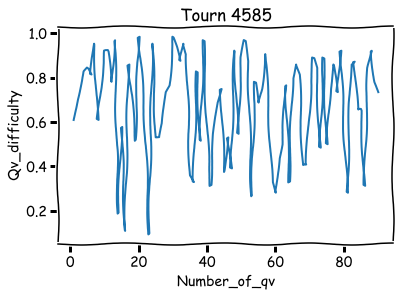

In [15]:
# Распределение сложности вопросов по дистанции
show_tourn_dist(4585)

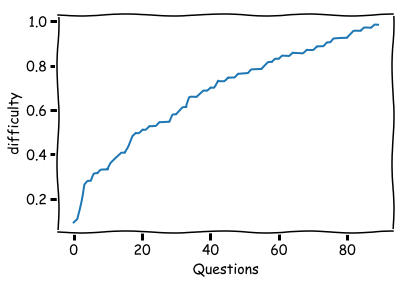

In [16]:
# Отсортированное распределение сложности вопросов на турнире 
show_tourn_lev(4585)

In [17]:
# функция выводит все команды, которые играли турниры с id между указанными
#parse_tourn(4585, 4586).head(5)

In [18]:
# функция вывод список последних 40 турниров команды 

## Применение функций

### Анализ одного турнира

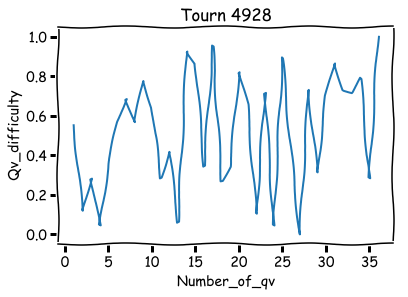

In [19]:
# Просто смотрим на сложность вопросов
show_tourn_dist(4928)

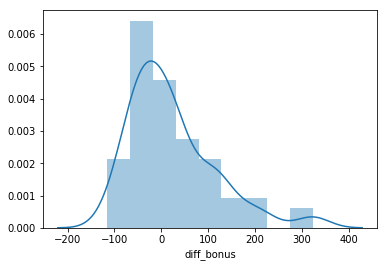

In [20]:
# распределение команд по величине бонуса
sns.distplot(get_tourn_result(4928)['diff_bonus'])

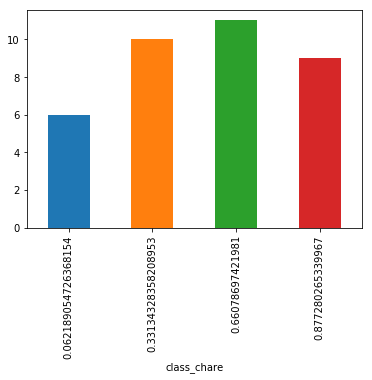

In [21]:
# число вопросов в 4 категориях: очень простые, простые, сложные и очень сложные
tourn_dif(4928).groupby('class_chare').count()['sum'].plot(kind='bar')

### Анализ одной команды

In [22]:
# распределение успеха команды на наборе турниров


#get_team_results([4585, 4739], 59814)

In [23]:
print(team_mark(4585, 55606), ':')
team_tourn_cat_dif(4777, 59814)

creat :


,class,plus,total,dif,top,team_share,avg_share,mark
1,0.333333,9,13,0.151442,0.911538,0.692308,0.848558,0
2,0.666667,9,16,0.439453,0.668750,0.562500,0.560547,1
3,1.000000,2,18,0.692708,0.422222,0.111111,0.307292,0
0,0.000000,1,13,0.903846,0.126923,0.076923,0.096154,0


In [24]:
# частота встречаемости оценок на наборе турниров

### Группы турниров

In [25]:
start=4031
stop=4055
df=parse_tourn(start, stop)
#df=pd.read_json('parse_tourn/'+str(start)+'-'+str(stop)+'.json')

In [30]:
%%time
a=parse_tourn(4033, 4687)

CPU times: user 40.3 s, sys: 1.08 s, total: 41.4 s
Wall time: 5min 11s


In [31]:
a.head(5)

,index,team_id,base_name,diff_bonus,position,tourn_id
0,0,87,Форум,-52,40.0,4033
1,1,312,Социал-демократы,-13,5.0,4033
2,2,353,Второе дыхание,122,67.5,4033
3,3,641,Братья,-98,28.5,4033
4,4,645,42,-3,100.5,4033


### Информативность классификации